In [1]:
import pandas as pd
import numpy as np

from sklearn import mixture
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import itertools

In [2]:
players = pd.read_csv('merged_players42-12.csv',index_col=0,parse_dates=['debut','finalGame'])
players.head()

,playerID,FPCT,POS,G,SH,OBP,AB/G,HR/G,SB/G,RBI/G,IBB/G,SF/G,debut,finalGame,weight,servingDays,debutAge,inducted
0,aaronha01,0.979124,OF,3298,21.0,0.373949,3.748939,0.228927,0.072771,0.696483,0.088842,0.036689,1954-04-13,1976-10-03,180.0,8209.0,20.293151,Y
1,aaronto01,0.982705,1B,437,9.0,0.291506,2.160183,0.029748,0.020595,0.215103,0.006865,0.013730,1962-04-10,1971-09-26,190.0,3456.0,23.287671,N
2,aasedo01,0.955399,P,448,0.0,0.000000,0.011161,0.000000,0.000000,0.000000,0.000000,0.000000,1977-07-26,1990-10-03,190.0,4817.0,23.580822,N
3,abadan01,0.986486,1B,15,0.0,0.240000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-09-10,2006-04-13,184.0,1676.0,29.712329,N
4,abbotje01,0.975208,OF,233,5.0,0.307453,2.557940,0.077253,0.025751,0.356223,0.008584,0.030043,1997-06-10,2001-09-29,190.0,1572.0,25.457534,N


In [3]:
players.shape

(7927, 18)

In [4]:
players.columns

Index(['playerID', 'FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'debut', 'finalGame', 'weight', 'servingDays',
       'debutAge', 'inducted'],
      dtype='object')

servingDays are just used for filter samples when check outliers.

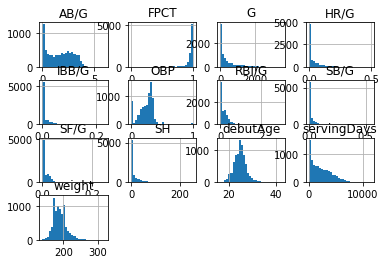

In [5]:
players.hist(bins=30)
plt.show()

In [6]:
features = [['G'],
            ['OBP'],
            ['FPCT'],
            ['FPCT','POS'],
            ['OBP','FPCT','POS'],
            ['G','OBP'],
            ['G','OBP','FPCT'],
            ['G','OBP','FPCT','POS'],
            ['G','FPCT'],
            ['G','FPCT','POS'],
            ['FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'weight', 'debutAge']]

num_list = []
for feature in features:
    X = players[feature]
    if ('POS' in feature):
        X = pd.get_dummies(X, columns = ['POS'] )
    y = players[['inducted']]
    
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 10)
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type='full', random_state = 2018)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm
            
    loglike=best_gmm.score_samples(X)
    players_pre = players[['playerID','servingDays','inducted']]
    players_pre.loc[:,'loglike']=loglike

    player10 = players_pre[players_pre['servingDays']>2000].sort_values(['loglike'],ascending=True).iloc[:100,:]
    num = (player10[player10['inducted']=='Y'].shape[0])
    num_list.append([num,feature])
    print(num)

num_list

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


47
12
1
0
0
28
13
22
21
17
26


[[47, ['G']],
 [12, ['OBP']],
 [1, ['FPCT']],
 [0, ['FPCT', 'POS']],
 [0, ['OBP', 'FPCT', 'POS']],
 [28, ['G', 'OBP']],
 [13, ['G', 'OBP', 'FPCT']],
 [22, ['G', 'OBP', 'FPCT', 'POS']],
 [21, ['G', 'FPCT']],
 [17, ['G', 'FPCT', 'POS']],
 [26,
  ['FPCT',
   'POS',
   'G',
   'SH',
   'OBP',
   'AB/G',
   'HR/G',
   'SB/G',
   'RBI/G',
   'IBB/G',
   'SF/G',
   'weight',
   'debutAge']]]

In [7]:
X = players[['G']]
y = players[['inducted']]

lowest_bic = np.infty
bic = []
n_components_range = range(1, 10)
for n_components in n_components_range:
    # Fit a Gaussian mixture with EM
    gmm = mixture.GaussianMixture(n_components=n_components,
                                  covariance_type='full', random_state = 2018)
    gmm.fit(X)
    bic.append(gmm.bic(X))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm = gmm

loglike=best_gmm.score_samples(X)
players_pre = players[['playerID','servingDays','inducted']]
players_pre.loc[:,'loglike']=loglike

player10 = players_pre[players_pre['servingDays']>2000].sort_values(['loglike'],ascending=True).iloc[:100,:]
num = (player10[player10['inducted']=='Y'].shape[0])
print(num)
player10[player10['inducted']=='Y']


47


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,playerID,servingDays,inducted,loglike
7850,yastrca01,8209.0,Y,-13.863560
0,aaronha01,8209.0,Y,-13.805197
3061,henderi01,8853.0,Y,-12.694377
5050,murraed02,7471.0,Y,-12.460039
6006,ripkeca01,7362.0,Y,-12.359807
4558,mayswi01,8143.0,Y,-12.324683
7763,winfida01,8139.0,Y,-12.252195
6061,robinbr01,8001.0,Y,-11.981390
7885,yountro01,7121.0,Y,-11.855056
588,biggicr01,7035.0,Y,-11.836937


In [15]:
player10['predict'] = 'Y'

In [19]:
t = player10[player10['inducted']=='Y']
t1 = t.merge(players[['playerID','POS']],on='playerID',how='right')

In [22]:
t.shape

(47, 5)

In [23]:
t1.shape

(7927, 6)

In [24]:
players.shape

(7927, 18)

In [26]:
players_pre = players.merge(player10[['playerID','predict']],on='playerID',how='left')
players_pre['predict'].fillna('N',inplace=True)

In [29]:
players_pre[players_pre['predict']!=players_pre['inducted']].POS.value_counts()

OF    34
P     31
1B    12
2B     8
3B     6
SS     6
C      6
Name: POS, dtype: int64

In [30]:
players_OF = players_pre[players_pre['POS']=='OF']

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(players_OF['inducted'], players_OF['predict'])

array([[1651,   26],
       [   8,   17]])

In [33]:
confusion_matrix(players_pre['inducted'], players_pre['predict'])

array([[7777,   53],
       [  50,   47]])

In [20]:
t1.POS.value_counts()

P     3334
OF    1702
C      785
1B     620
SS     543
2B     497
3B     446
Name: POS, dtype: int64

In [12]:
players_Y = players[players['inducted']=='Y']
players_Y.POS.value_counts()

P     31
OF    25
1B    10
3B     9
2B     9
C      7
SS     6
Name: POS, dtype: int64